## Adventures in coin flipping
### AKA Introduction to the Binomial Distribution

In [3]:
import random
results = []
for trial in xrange(10000):
    heads = 0
    for i in xrange(100):
        flip = random.randint(0,1)
        if (flip == 0):
            heads += 1
    results.append(heads)
print results[1:10]

[48, 48, 55, 54, 52, 52, 56, 50, 51]


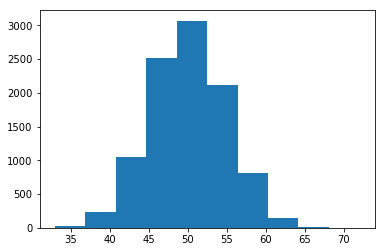

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(results)
plt.show()

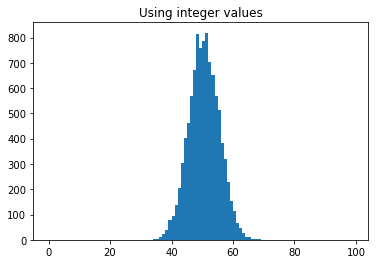

In [5]:
## Plot the histogram using integer values by creating more bins
plt.figure()
plt.hist(results, bins=range(100))
plt.title("Using integer values")
plt.show()

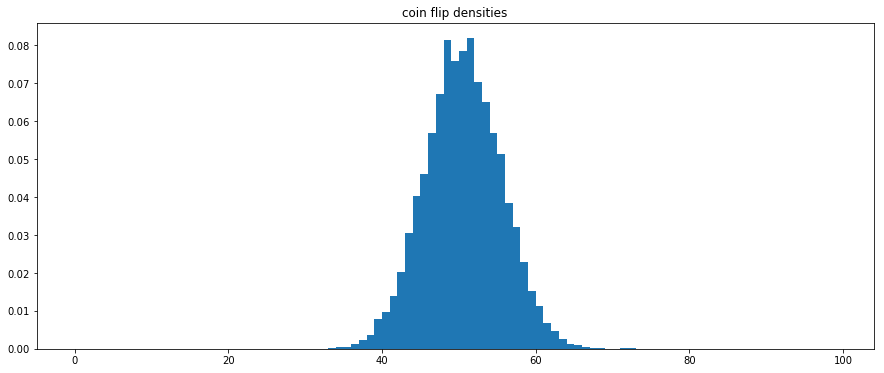

In [6]:
## Plot the density function, notice bars sum to exactly 1 
## Also make the plot bigger
plt.figure(figsize=(15,6))
plt.hist(results, bins=range(100), normed=True)
plt.title("coin flip densities")
plt.show()

## The binomial distribution is closely related to the normal distribution (aka Gaussian distribution)
![Normal Distributions](https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG)

The probability density for the Gaussian distribution is
![Gaussian density](https://docs.scipy.org/doc/numpy/_images/math/3f40671c78b1cb1d6a6f4a306a2b39a6d55921cf.png)


In [7]:
flips_mean = float(sum(results)) / len(results)
print flips_mean

50.0762


In [8]:
## the numpy package has lots of useful routines: http://www.numpy.org/
import numpy as np
mean = np.mean(results)
print mean

50.0762


In [9]:
## we could code standard deviation by hand, but numpy makes it easier
stdev=np.std(results)
print stdev

4.94398559464


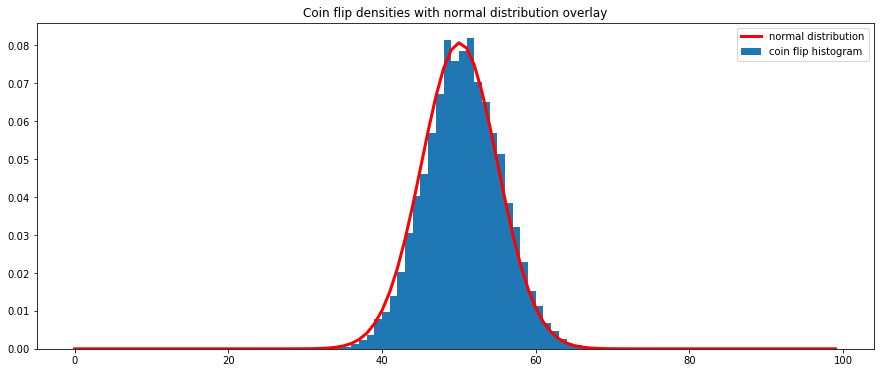

In [10]:
## Overlay a normal distribution on top of the coin flip data
plt.figure(figsize=(15,6))
count, bins, patches = plt.hist(results, bins=range(100), normed=True, label="coin flip histogram")
plt.plot(bins, 1/(stdev * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mean)**2 / (2 * stdev**2) ),
          linewidth=3, color='red', label="normal distribution")
plt.title("Coin flip densities with normal distribution overlay")
plt.legend()
plt.show()

## Could we figure this out analytically? 



### General Form



$$
p(\text{k heads in n flips}) = (\text{prob. of this many heads}) * \
                               (\text{prob. of this many tails}) * \
                               (\text{how many possible orderings?})
$$


### Specifics


$$
p(\text{k heads in n flips}) = {n \choose k} p^{k} (1-p)^{(n-k)}
$$

$$
p \leftarrow \text { probability of heads in a single flip }
$$

$$
p^k \leftarrow \text{ total probability of k heads}
$$

$$
1-p \leftarrow \text{ probabilty of one tails}
$$

$$
n-k \leftarrow \text{ number of tails}
$$

$$
(1-p)^{(n-k)} \leftarrow \text{ probability of all the tails}
$$

$$
{n \choose k} \leftarrow \text{ all the possible orderings of k heads in n flips}
$$

**Reminder: **

$$
{n \choose k} = \frac{n!}{k!(n-k)!}
$$

In [11]:
prob_heads = .5
num_flips = 100
num_heads = 25
prob_flips = np.math.factorial(num_flips) / \
            (np.math.factorial(num_heads) * np.math.factorial(num_flips-num_heads)) * \
            (prob_heads**num_heads) * ((1-prob_heads)**(num_flips-num_heads))
print "The probability of seeing %d heads in %d flips is %.015f" % (num_heads, num_flips, prob_flips)

The probability of seeing 25 heads in 100 flips is 0.000000191313971


In [12]:
## Another super useful package is scipy
import scipy.stats
sp_prob = scipy.stats.binom.pmf(num_heads, num_flips, prob_heads)
print "scipy computed it as %0.15f" % sp_prob


scipy computed it as 0.000000191313971


## How can we use the mean and standard deviation to estimate the probability?

### FACT: The mean of the binomial distribution is 
mean = n * p

### FACT: The standard deviation of the binomial distribution is 
$$
stdev = \sqrt{n*p*(1 − p)}
$$
 
(For a fixed probability, stdev grows with the sqrt of the number of trials)

In [13]:
expected_mean  = num_flips * prob_heads
expected_stdev = np.math.sqrt(num_flips * prob_heads * (1 - prob_heads)) 

print "In %d flips, with a probability %.02f" % (num_flips, prob_heads)
print "The expected frequency is %.02f +/- %.02f" % (expected_mean, expected_stdev)
print "The observed frequency was %0.2f +/- %0.2f" % (mean, stdev)

In 100 flips, with a probability 0.50
The expected frequency is 50.00 +/- 5.00
The observed frequency was 50.08 +/- 4.94


### Conclusion: Given a mean of 50, and a standard deviation of ~5, seeing only 25 heads out of 100 occurs with a probability of about 5 standard deviations from the mean. This implies this is a *highly significant event*, as more than 3 standard deviations implies less than a 1% chance. In fact, we saw no examples of this in 100,000 random trials (p-value < 1/100000; p-value < 1e-5), and only expect 1 occurrence in 10,000,000 (p-value = 1.9e-7)